# Netflix IMDB Scores visualization
#### Author: `Yehor Bolotov`
#### [Dataset link](https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores/data)

## Step 1: Set up an environment

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

## Step 2: Import, understanding, cleaning the data

In [73]:
# Import Netflix data
df = pd.read_csv('Netflix TV Shows and Movies.csv')

# Print head of DataFrame
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [74]:
# DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [75]:
# DataFrame describe
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [76]:
# Drop unusable columns
df = df.drop(columns=['index', 'id', 'imdb_id'])

df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


## Step 3: Data visualization

### General Trends and Distribution:

#### 1. Distribution of TV Shows and Movies

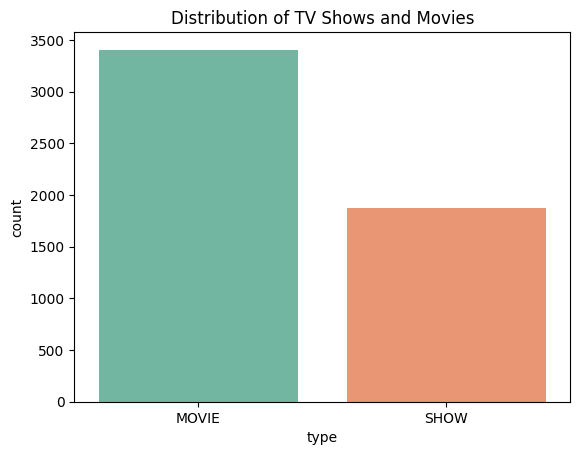

In [77]:
sns.countplot(x='type', data=df, hue='type', palette='Set2')
plt.title('Distribution of TV Shows and Movies')
plt.show()

#### 2. Distribution of IMDb Scores for TV Shows and Movies

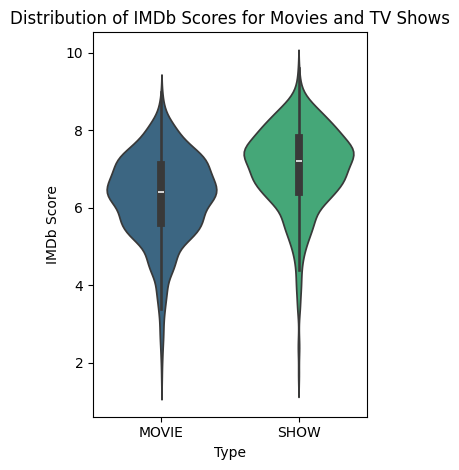

In [82]:
plt.subplot(1, 2, 2)
sns.violinplot(x='type', y='imdb_score', hue='type', legend=False, data=df, palette='viridis')
plt.title('Distribution of IMDb Scores for Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('IMDb Score')

plt.tight_layout()
plt.show()

#### 3. Age Certification Distribution

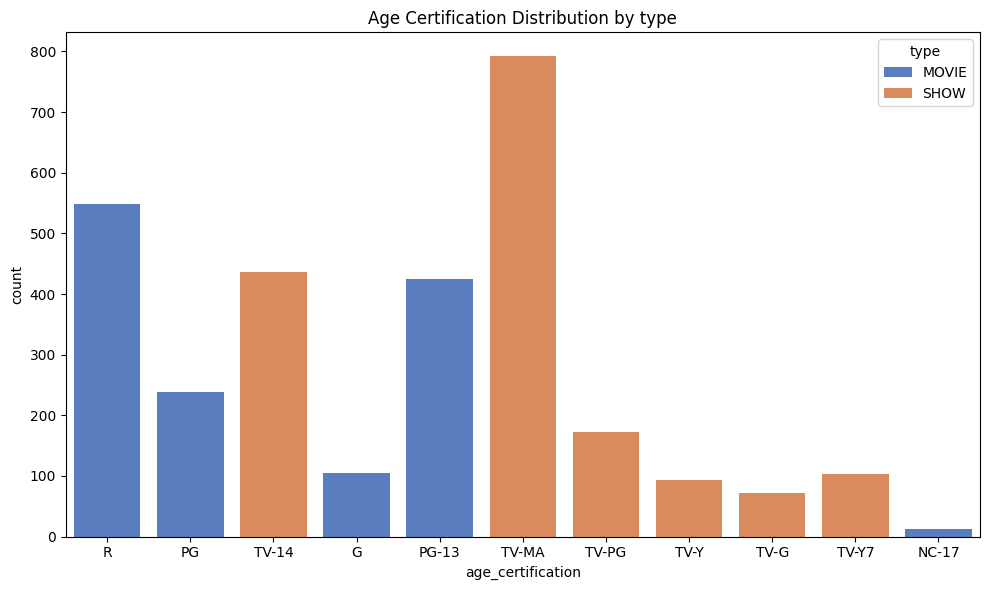

In [78]:
plt.figure(figsize=(10, 6))

sns.countplot(x='age_certification', hue='type', legend=True, data=df, palette='muted')
plt.title('Age Certification Distribution by type')
plt.tight_layout()
plt.show()

#### 4. Release year Distribution

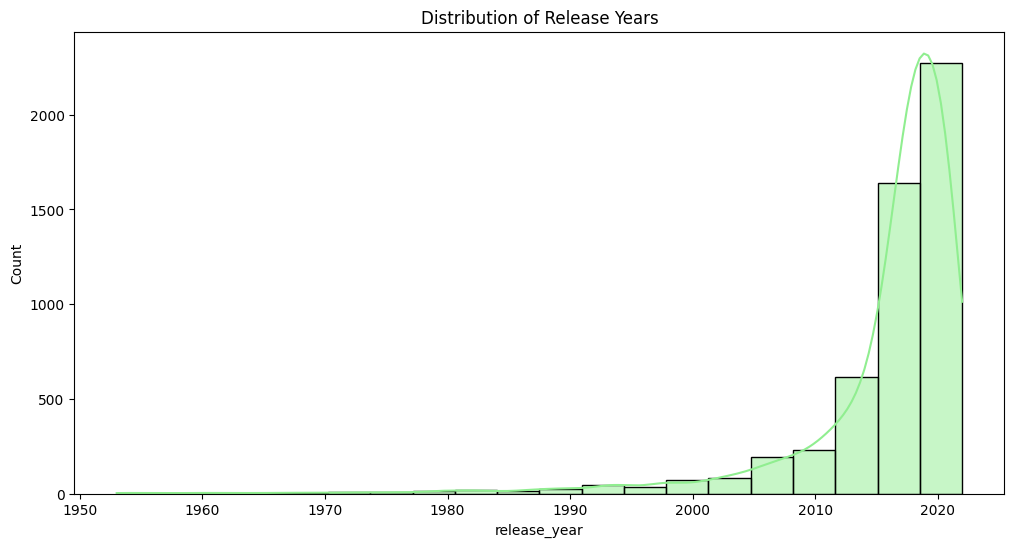

In [95]:
plt.figure(figsize=(12, 6))
sns.histplot(x='release_year', bins=20, kde=True, data=df, color='lightgreen', edgecolor='black')
plt.title('Distribution of Release Years')
plt.show()

#### 5. IMDB Score Distribution

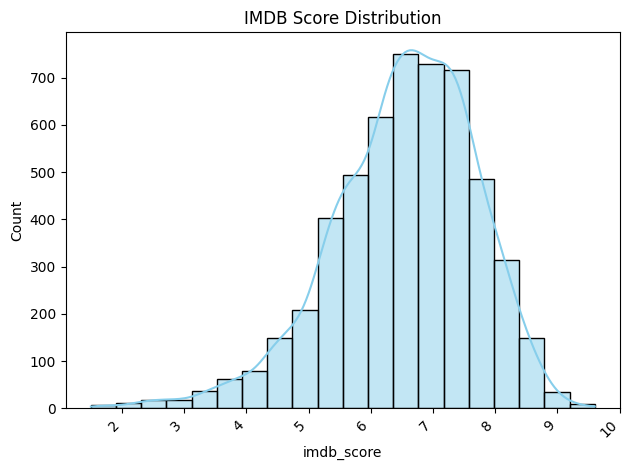

In [90]:
sns.histplot(x='imdb_score', bins=20, kde=True, data=df, color='skyblue', edgecolor='black')
plt.title('IMDB Score Distribution')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


#### 6. Top-10 Rated Titles

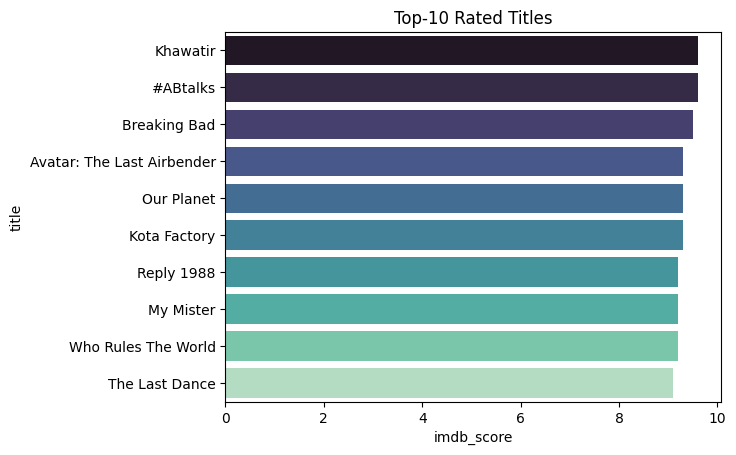

In [81]:
top_rated = df.nlargest(10, 'imdb_score')  # Change 5 to the desired number of top-rated titles
sns.barplot(x='imdb_score', y='title', hue='title', data=top_rated, palette='mako')
plt.title('Top-10 Rated Titles')
plt.show()

#### 7. IMDB Votes vs IMDB Score (with Release Year)

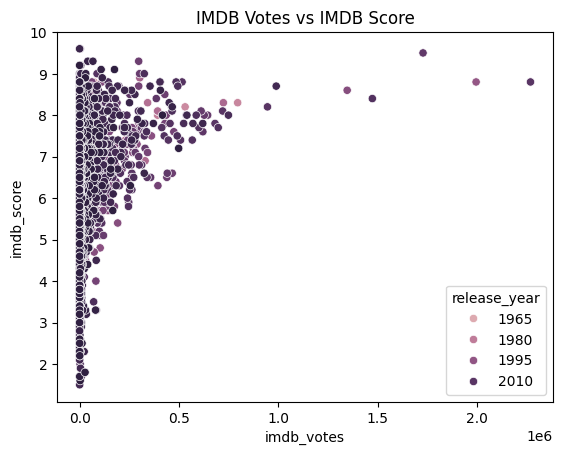

In [83]:
sns.scatterplot(x='imdb_votes', y='imdb_score',  hue='release_year', data=df, color='purple')
plt.title('IMDB Votes vs IMDB Score')
plt.show()

#### 8. IMDb Scores and Votes Across Release Years

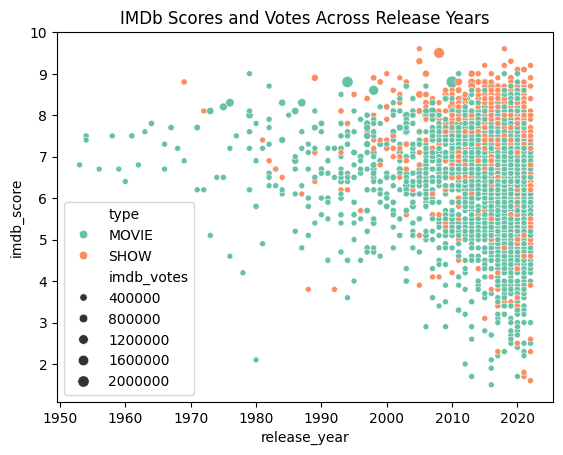

In [91]:
sns.scatterplot(x='release_year', y='imdb_score', hue='type', size='imdb_votes', data=df, palette='Set2')
plt.title('IMDb Scores and Votes Across Release Years')
plt.show()

### Correlation and Pairwise Analysis:

#### 1. Pair Plot of Numeric Columns:

<Figure size 1200x800 with 0 Axes>

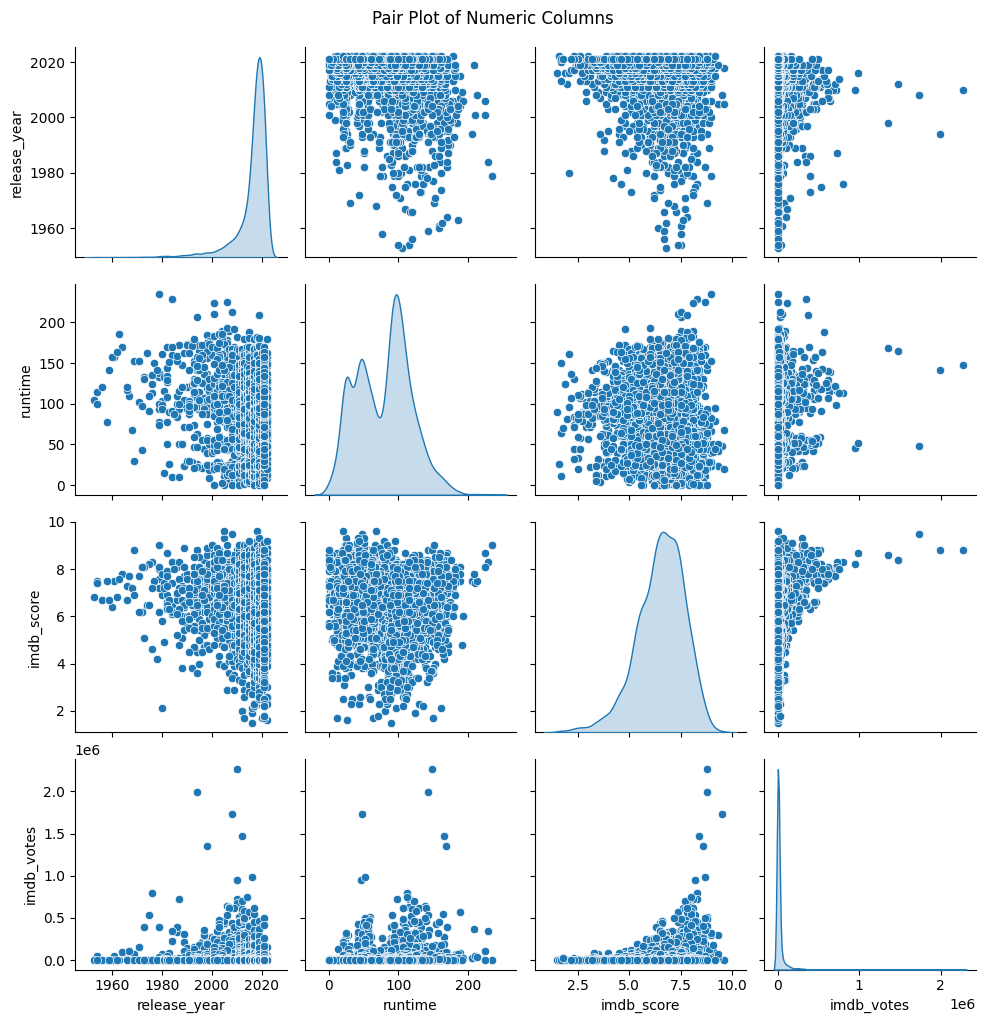

In [85]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['release_year', 'runtime', 'imdb_score', 'imdb_votes']], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()

#### 2. Correlation Heatmap for Numeric Columns

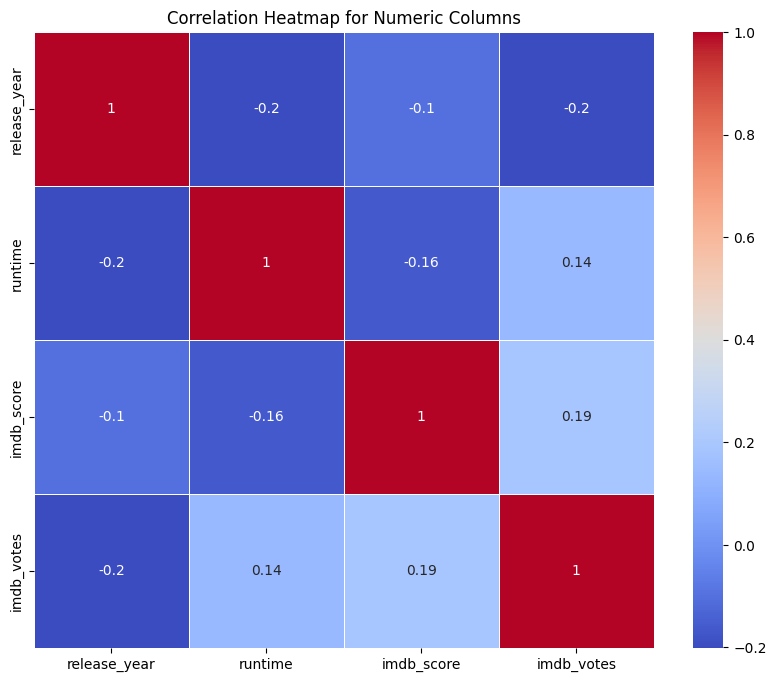

In [86]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_numeric = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

### Text Analysis:

#### 1. Word Cloud of Most Popular Words in Description

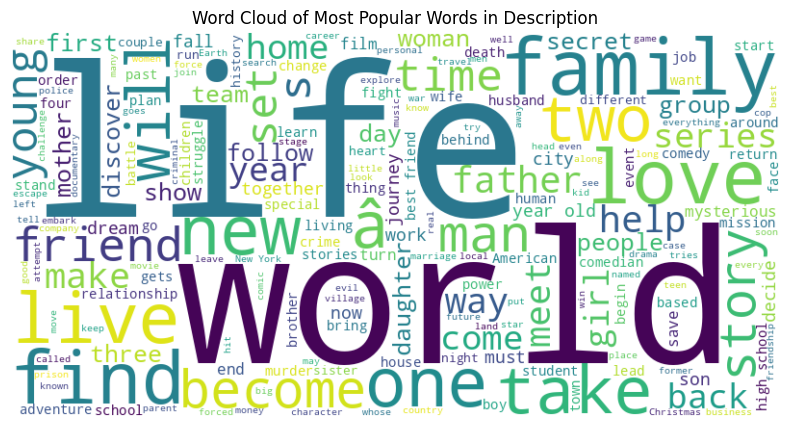

In [87]:
# Combine all descriptions into a single string
text = ' '.join(df['description'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Popular Words in Description')
plt.show()

#### 2. Sentiment Distribution in Descriptions

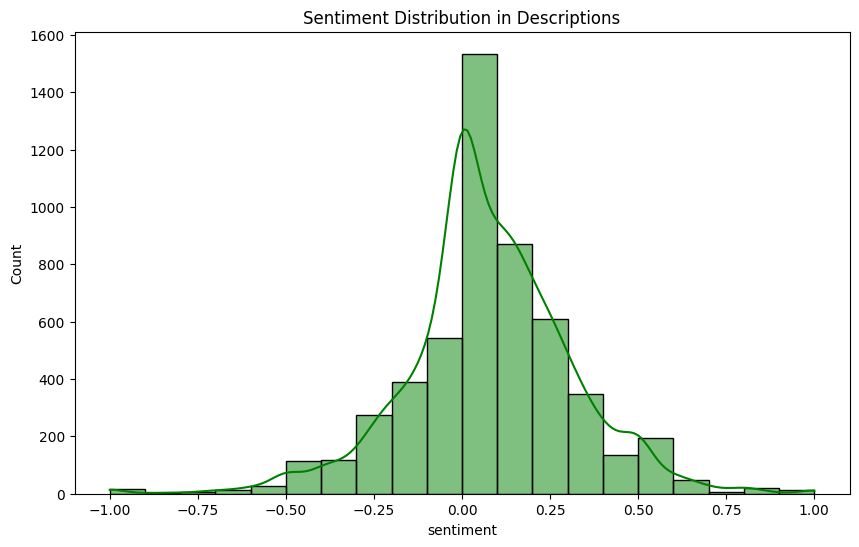

In [88]:
df['sentiment'] = df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Sentiment Distribution in Descriptions')
plt.show()